In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline


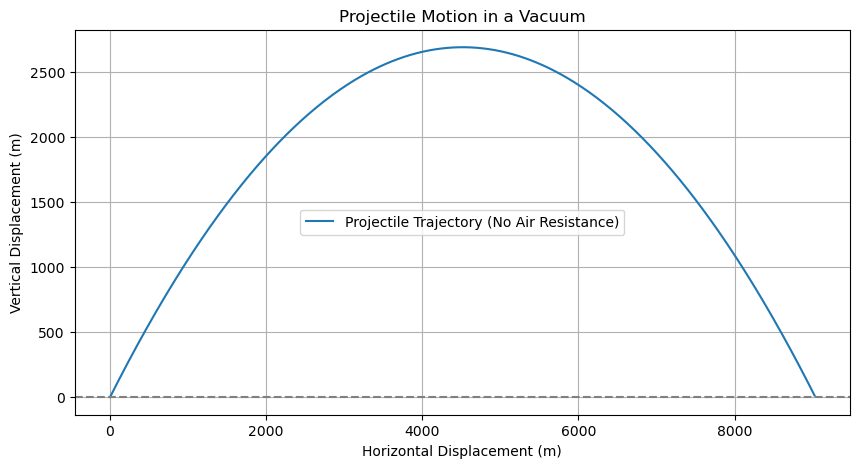

Time when the projectile hits the ground: 46.85 s
Horizontal range: 9023.50 m


In [2]:
#part A


g = 9.81  # Acceleration due to gravity (m/s^2)

# Initial conditions
v0 = 300  # Initial velocity (m/s)
theta = np.radians(50)  # Launch angle in radians
vx0 = v0 * np.cos(theta)  # Initial horizontal velocity
vy0 = v0 * np.sin(theta)  # Initial vertical velocity
x0, y0 = 0, 0  # Initial position

# Equations of motion without drag
def projectile_vacuum(t, z):
    x, vx, y, vy = z
    return [vx, 0, vy, -g]  # dx/dt = vx, dvx/dt = 0 (no horizontal acceleration), dy/dt = vy, dvy/dt = -g

# Event function to stop integration when projectile hits the ground (y = 0)
def hit_ground(t, z):
    return z[2]  # Return y position

hit_ground.terminal = True  # Stop the solver when y = 0
hit_ground.direction = -1  # Detect only when y is decreasing

# Time interval
t_span = [0, 50]
z0 = [x0, vx0, y0, vy0]  # Initial state

# Solve using RK45 method with event detection for hitting the ground
sol = solve_ivp(projectile_vacuum, t_span, z0, t_eval=np.linspace(0, 50, 500), events=hit_ground, method='RK45')

# Extract solution
x = sol.y[0]
y = sol.y[2]

# Plot the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Projectile Trajectory (No Air Resistance)")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Projectile Motion in a Vacuum")
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()

# Print horizontal range and time of flight
print(f"Time when the projectile hits the ground: {sol.t_events[0][0]:.2f} s")
print(f"Horizontal range: {x[-1]:.2f} m")



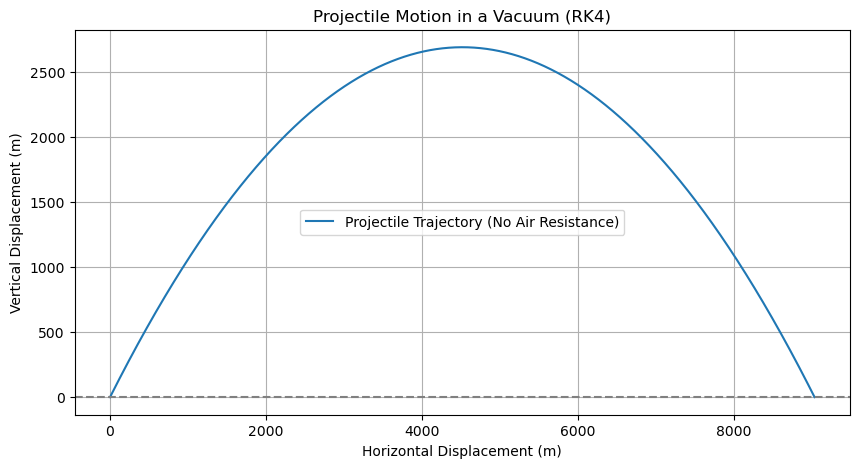

Time when the projectile hits the ground: 46.85 s
Horizontal range: 9034.38 m


In [3]:
#part b
g = 9.81  # Acceleration due to gravity (m/s^2)
# Initial conditions
v0 = 300  # Initial velocity (m/s)
theta = np.radians(50)  # Launch angle in radians
vx0 = v0 * np.cos(theta)  # Initial horizontal velocity
vy0 = v0 * np.sin(theta)  # Initial vertical velocity
x0, y0 = 0, 0  # Initial position

# Time step and time range
dt = 0.01
t_max = 50

# Equations of motion without drag
def derivatives(t, z):
    x, vx, y, vy = z
    return [vx, 0, vy, -g]

# 4th order Runge-Kutta (RK4) implementation
def rk4_step(func, t, z, dt):
    k1 = np.array(func(t, z))
    k2 = np.array(func(t + 0.5 * dt, z + 0.5 * k1 * dt))
    k3 = np.array(func(t + 0.5 * dt, z + 0.5 * k2 * dt))
    k4 = np.array(func(t + dt, z + k3 * dt))
    return z + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

# Initial conditions for state vector
z = [x0, vx0, y0, vy0]

# Lists to store results
t_values = [0]
x_values = [x0]
y_values = [y0]

# Time loop using RK4
t = 0
while t < t_max and z[2] >= 0:  # Stop when y < 0
    z = rk4_step(derivatives, t, z, dt)
    t += dt
    if z[2] >= 0:  # Only store values while y >= 0
        t_values.append(t)
        x_values.append(z[0])
        y_values.append(z[2])

# Plot the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label="Projectile Trajectory (No Air Resistance)")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Projectile Motion in a Vacuum (RK4)")
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()

# Print horizontal range and time of flight
print(f"Time when the projectile hits the ground: {t_values[-1]:.2f} s")
print(f"Horizontal range: {x_values[-1]:.2f} m")



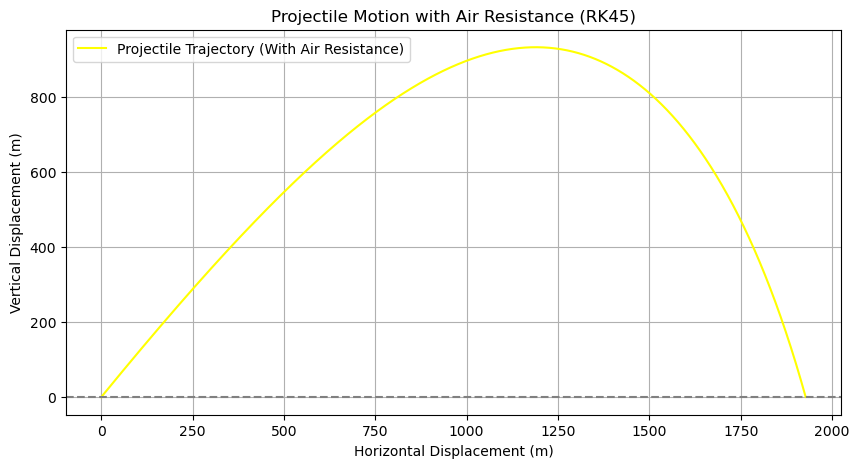

Time when the projectile hits the ground: 34.99 s
Horizontal range: 2090.60 m


In [7]:
#part c

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
gamma = 0.25  # Drag coefficient
D = 0.15  # Diameter of the cannonball (m)
lambda_ = 10000  # Exponential decay constant (m)
m = 7.8  # Density of the cannonball (kg/m^3)
v0 = 300  # Initial velocity (m/s)
theta = np.radians(50)  # Launch angle in radians

# Initial conditions
vx0 = v0 * np.cos(theta)  # Initial horizontal velocity
vy0 = v0 * np.sin(theta)  # Initial vertical velocity
x0, y0 = 0, 0  # Initial position

# Drag coefficient function
def drag_coefficient(y):
    return gamma * D**2 * np.exp(-y / lambda_)

# Equations of motion with drag
def equations(t, z):
    x, vx, y, vy = z
    v = np.sqrt(vx**2 + vy**2)  # Speed magnitude
    drag = drag_coefficient(y) * v**2 / m
    ax = -drag * vx / v  # Acceleration due to drag (horizontal)
    ay = -g - (drag * vy / v)  # Acceleration due to drag (vertical)
    return [vx, ax, vy, ay]

# Time span and initial conditions
t_span = (0, 35)
initial_conditions = [x0, vx0, y0, vy0]

# Solve ODE using SciPy's solve_ivp with RK45 method
sol = solve_ivp(equations, t_span, initial_conditions, method='RK45', t_eval=np.arange(0, 35, 0.01))

# Filter out positions where y < 0
valid_indices = sol.y[2] >= 0
x_valid = sol.y[0][valid_indices]
y_valid = sol.y[2][valid_indices]

# Plot the trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_valid, y_valid, label="Projectile Trajectory (With Air Resistance)", color = "yellow")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Projectile Motion with Air Resistance (RK45)")
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()

# Print final time and horizontal range
final_time = sol.t[-1]
horizontal_range = sol.y[0][-1]
print(f"Time when the projectile hits the ground: {final_time:.2f} s")
print(f"Horizontal range: {horizontal_range:.2f} m")



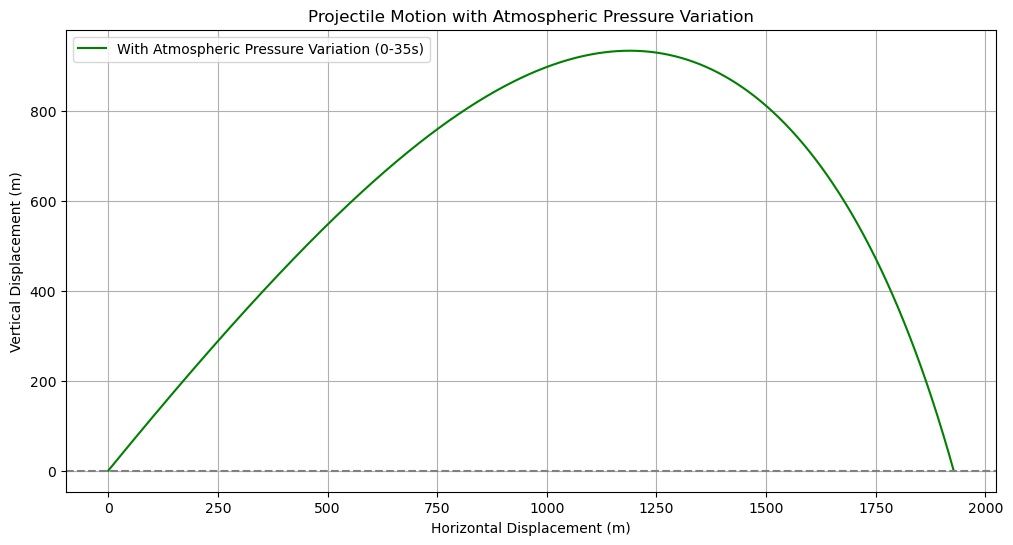

Time when the projectile hits the ground (With Atmospheric Pressure Variation): 34.99 s
Horizontal range (With Atmospheric Pressure Variation): 2090.60 m


In [8]:


# Drag coefficient function with atmospheric pressure variation
def drag_coefficient(y):
    return gamma * D**2 * np.exp(-y / lambda_)

# Equations of motion with atmospheric pressure variation
def equations_with_pressure(t, z):
    x, vx, y, vy = z
    v = np.sqrt(vx**2 + vy**2)  # Speed magnitude
    drag = drag_coefficient(y) * v**2 / m
    ax = -drag * vx / v  # Acceleration due to drag (horizontal)
    ay = -g - (drag * vy / v)  # Acceleration due to drag (vertical)
    return [vx, ax, vy, ay]

# Time span and evaluation points
t_span_with_pressure = (0, 35)
t_eval_with_pressure = np.arange(0, 35, 0.01)

# Solve ODEs with atmospheric pressure variation
sol_with_pressure = solve_ivp(equations_with_pressure, t_span_with_pressure, [x0, vx0, y0, vy0], method='RK45', t_eval=t_eval_with_pressure)

# Filter valid data
valid_indices_with_pressure = sol_with_pressure.y[2] >= 0
x_valid_with_pressure = sol_with_pressure.y[0][valid_indices_with_pressure]
y_valid_with_pressure = sol_with_pressure.y[2][valid_indices_with_pressure]

# Plotting
plt.figure(figsize=(12, 6))

# Plot with atmospheric pressure variation (0 to 35 seconds)
plt.plot(x_valid_with_pressure, y_valid_with_pressure, label="With Atmospheric Pressure Variation (0-35s)", color='green')

# Finalize plot
plt.axhline(0, color='gray', linestyle='--')
plt.title("Projectile Motion with Atmospheric Pressure Variation")
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Time when the projectile hits the ground (With Atmospheric Pressure Variation): {sol_with_pressure.t[-1]:.2f} s")
print(f"Horizontal range (With Atmospheric Pressure Variation): {sol_with_pressure.y[0][-1]:.2f} m")



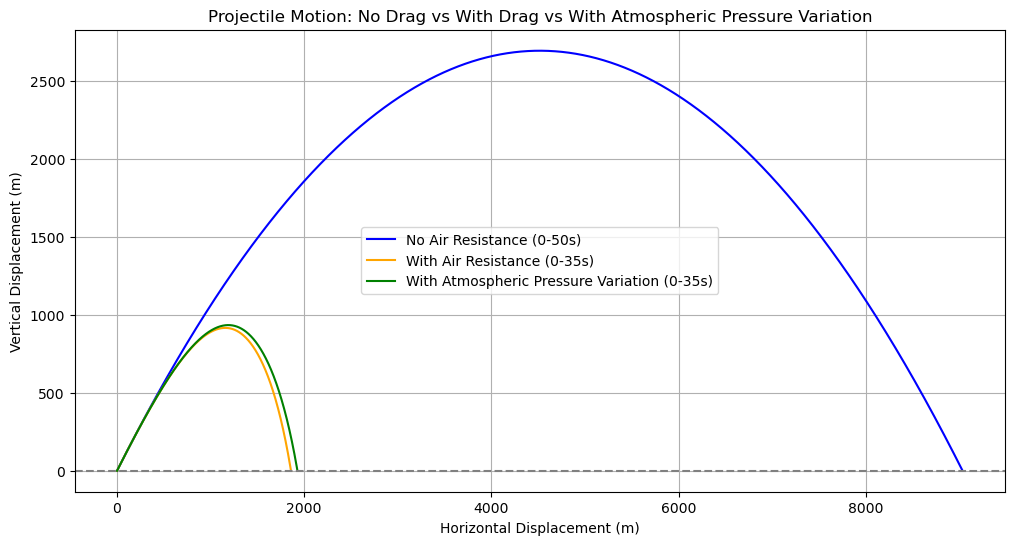

Time when the projectile hits the ground (No Drag): 49.99 s
Horizontal range (No Drag): 9639.89 m
Time when the projectile hits the ground (With Drag): 34.99 s
Horizontal range (With Drag): 2019.07 m
Time when the projectile hits the ground (With Atmospheric Pressure): 34.99 s
Horizontal range (With Atmospheric Pressure): 2090.60 m


In [9]:


# Drag coefficient function with atmospheric pressure variation
def drag_coefficient(y):
    return gamma * D**2 * np.exp(-y / lambda_)

# Equations of motion without drag
def derivatives_no_drag(t, z):
    x, vx, y, vy = z
    return [vx, 0, vy, -g]

# Equations of motion with drag
def equations_with_drag(t, z):
    x, vx, y, vy = z
    v = np.sqrt(vx**2 + vy**2)  # Speed magnitude
    drag = gamma * D**2 * v**2 / m  # Drag coefficient constant
    ax = -drag * vx / v  # Acceleration due to drag (horizontal)
    ay = -g - (drag * vy / v)  # Acceleration due to drag (vertical)
    return [vx, ax, vy, ay]

# Equations of motion with atmospheric pressure variation
def equations_with_pressure(t, z):
    x, vx, y, vy = z
    v = np.sqrt(vx**2 + vy**2)  # Speed magnitude
    drag = drag_coefficient(y) * v**2 / m
    ax = -drag * vx / v  # Acceleration due to drag (horizontal)
    ay = -g - (drag * vy / v)  # Acceleration due to drag (vertical)
    return [vx, ax, vy, ay]

# Time spans and evaluation points
t_span_no_drag = (0, 50)
t_span_with_drag = t_span_with_pressure = (0, 35)
t_eval_no_drag = np.arange(0, 50, 0.01)
t_eval_with_drag_and_pressure = np.arange(0, 35, 0.01)

# Solve ODEs
sol_no_drag = solve_ivp(derivatives_no_drag, t_span_no_drag, [x0, vx0, y0, vy0], method='RK45', t_eval=t_eval_no_drag)
sol_with_drag = solve_ivp(equations_with_drag, t_span_with_drag, [x0, vx0, y0, vy0], method='RK45', t_eval=t_eval_with_drag_and_pressure)
sol_with_pressure = solve_ivp(equations_with_pressure, t_span_with_pressure, [x0, vx0, y0, vy0], method='RK45', t_eval=t_eval_with_drag_and_pressure)

# Filter valid data
valid_indices_no_drag = sol_no_drag.y[2] >= 0
valid_indices_with_drag = sol_with_drag.y[2] >= 0
valid_indices_with_pressure = sol_with_pressure.y[2] >= 0

x_valid_no_drag = sol_no_drag.y[0][valid_indices_no_drag]
y_valid_no_drag = sol_no_drag.y[2][valid_indices_no_drag]
x_valid_with_drag = sol_with_drag.y[0][valid_indices_with_drag]
y_valid_with_drag = sol_with_drag.y[2][valid_indices_with_drag]
x_valid_with_pressure = sol_with_pressure.y[0][valid_indices_with_pressure]
y_valid_with_pressure = sol_with_pressure.y[2][valid_indices_with_pressure]

# Plotting
plt.figure(figsize=(12, 6))
# Plot without drag (0 to 50 seconds)
plt.plot(x_valid_no_drag, y_valid_no_drag, label="No Air Resistance (0-50s)", color='blue')
# Plot with drag (0 to 35 seconds)
plt.plot(x_valid_with_drag, y_valid_with_drag, label="With Air Resistance (0-35s)", color='orange')

# Plot with atmospheric pressure variation (0 to 35 seconds)
plt.plot(x_valid_with_pressure, y_valid_with_pressure, label="With Atmospheric Pressure Variation (0-35s)", color='green')

plt.axhline(0, color='gray', linestyle='--')
plt.title("Projectile Motion: No Drag vs With Drag vs With Atmospheric Pressure Variation")
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Time when the projectile hits the ground (No Drag): {sol_no_drag.t[-1]:.2f} s")
print(f"Horizontal range (No Drag): {sol_no_drag.y[0][-1]:.2f} m")
print(f"Time when the projectile hits the ground (With Drag): {sol_with_drag.t[-1]:.2f} s")
print(f"Horizontal range (With Drag): {sol_with_drag.y[0][-1]:.2f} m")
print(f"Time when the projectile hits the ground (With Atmospheric Pressure): {sol_with_pressure.t[-1]:.2f} s")
print(f"Horizontal range (With Atmospheric Pressure): {sol_with_pressure.y[0][-1]:.2f} m")
